In [1]:
from main import importdataset, interpolateT, interpolateK
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import random

In [2]:
#Import the data using importdataset() from ImportData.py
optionSPX, priceSPX, zcr, SPXclose = importdataset()

The dataset contains 49.33926639530743 % of ITM options. They should be dropped.
The dataset optionSPX contains 0 NaN entries. They should be fixed.
The dataset optionSPX contains 0 negative entries for positive-definite variables. They should be fixed.


In [3]:
#Split Call and Put
#We keep only OTM Call, while for the put we keep also the ATM one. This way the ATM will always be a PUT option
callSPX = optionSPX[(optionSPX['cp_flag']=='C') & (optionSPX['strike_price']>optionSPX['ATM_strike']-20)].copy() #Select only OTM Call
callSPX = callSPX[['date','cp_flag','strike_price','expT','mid_price','close','ITM','ATM_strike']]

putSPX =  optionSPX[(optionSPX['cp_flag']=='P') & (optionSPX['strike_price']<=optionSPX['ATM_strike']+20)].copy() #Select only OTM Put
putSPX =  putSPX[['date','cp_flag','strike_price','expT','mid_price','close','ITM','ATM_strike']]


In [4]:
callSPX[callSPX.date=19960104]

SyntaxError: invalid syntax (<ipython-input-4-60eb2ddbc405>, line 1)

In [ ]:
callSPX.interpolate

### Interpolation

In [ ]:
try:
    #First interpolateT and after interpolateK
    call30 = interpolateT(callSPX,30)
    call30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/call30TimeInt.csv')
except ExplicitException:
    pass

try:
    miscall30 = interpolateK(call30,cp_flag='C',max_expT=200,min_expT=0)
    miscall30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/call30TimeInt_missing.csv')
except ExplicitException:
    pass

try:
    put30 = interpolateT(putSPX,30)
    put30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/put30TimeInt.csv')
except ExplicitException:
    pass

try:
    mis_put30 = interpolateK(put30,cp_flag='C',max_expT=200,min_expT=0)
    mis_put30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/put30TimeInt_missing.csv')
except ExplicitException:
    pass

try:
    #First interpolateK and after interpolateT
    call30 = interpolateK(callSPX,cp_flag='C',max_expT=100,min_expT=0)
    call30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/call30StrikeInt.csv')
except ExplicitException:
    pass

try:
    miscall30 = interpolateT(call30,30)
    miscall30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/call30StrikeInt_T.csv')
except ExplicitException:
    pass

try:
    put30 = interpolateK(putSPX,cp_flag='C',max_expT=100,min_expT=0)
    put30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/put30StrikeInt.csv')
except ExplicitException:
    pass

try:
    mis_put30 = interpolateT(put30,30)
    mis_put30.to_csv('/home/student/surface/Realized Variance/DatasetSPX/New Interpolation/put30StrikeInt_T.csv')
except ExplicitException:
    pass



# Some Data Exploration

Text(0.5, 1.0, 'Date: 04-02-1998\nOTM Call Option')

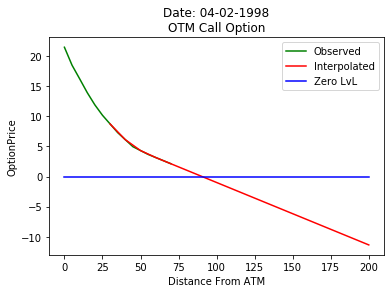

In [220]:
#date = random.randint(1996,2017)*10000 + random.randint(1,12) *100 + random.randint(1,28)
plt.plot(call30[(call30['date']==date) & (call30['OTM_K']<=200)].sort_values(by=['date','expT','strike_price'])['OTM_K'],
         call30[(call30['date']==date) & (call30['OTM_K']<=200)].sort_values(by=['date','expT','strike_price'])['mid_price'],
          color='g')

plt.plot(test[test['date']==date].sort_values(by=['date','expT','strike_price'])['OTM_K'],
         test[test['date']==date].sort_values(by=['date','expT','strike_price'])['mid_price'],
          color='r')

plt.plot(np.linspace(0,200,40),np.zeros(40),color='b')

plt.xlabel('Distance From ATM')
plt.ylabel('OptionPrice')
plt.legend(['Observed','Interpolated','Zero LvL'])
plt.title('Date: 04-02-1998\nOTM Call Option')

In [219]:
call30[call30['date']==date].sort_values(by=['date','expT','strike_price'])

,Unnamed: 0,date,cp_flag,strike_price,expT,mid_price,close,ITM,ATM_strike,OTM_K
5470,103807,19980204,C,1005.0,30,21.450893,1006.9,0,1005,0.0
5471,103809,19980204,C,1010.0,30,18.475446,1006.9,0,1005,5.0
5472,103811,19980204,C,1015.0,30,16.218750,1006.9,0,1005,10.0
5473,103813,19980204,C,1020.0,30,13.919643,1006.9,0,1005,15.0
5474,103815,19980204,C,1025.0,30,11.888393,1006.9,0,1005,20.0
5475,103817,19980204,C,1030.0,30,10.165179,1006.9,0,1005,25.0
5476,103819,19980204,C,1040.0,30,7.285714,1006.9,0,1005,35.0
5477,103821,19980204,C,1050.0,30,4.948661,1006.9,0,1005,45.0
5478,103825,19980204,C,1060.0,30,3.669643,1006.9,0,1005,55.0
5479,103827,19980204,C,1075.0,30,2.116071,1006.9,0,1005,70.0


In [95]:
test[test['date']==date]

,Unnamed: 0,Unnamed: 0.1,date,cp_flag,strike_price,expT,mid_price,close,ITM,ATM_strike,OTM_K
75418,42529,737783,20070625,C,1605,30,0.641071,1497.74,0,1500,105
75419,42529,737783,20070625,C,1610,30,0.525000,1497.74,0,1500,110
75420,42529,737783,20070625,C,1615,30,0.408929,1497.74,0,1500,115
75421,42532,737791,20070625,C,1635,30,0.175000,1497.74,0,1500,135
75422,42533,737793,20070625,C,1645,30,0.135714,1497.74,0,1500,145
75423,42534,737795,20070625,C,1655,30,0.207143,1497.74,0,1500,155
75424,42534,737795,20070625,C,1665,30,0.307143,1497.74,0,1500,165
75425,42534,737795,20070625,C,1670,30,0.357143,1497.74,0,1500,170
75426,42534,737795,20070625,C,1675,30,0.407143,1497.74,0,1500,175
75427,42534,737795,20070625,C,1680,30,0.457143,1497.74,0,1500,180


In [172]:
np.round(problem.values/10000,0)

array([1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996.,

(array([81.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013]),
 <a list of 17 Patch objects>)

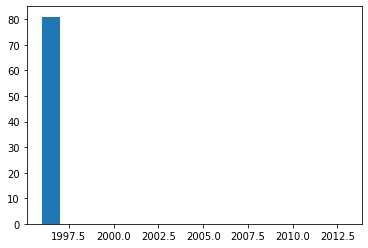

In [14]:
plt.hist(np.round(problem.values/10000,0),bins=[1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013])


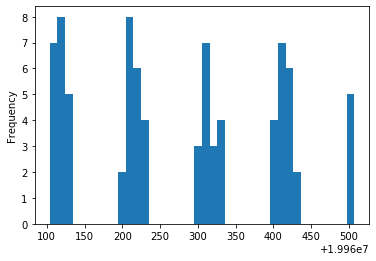

In [13]:
problem = pd.to_numeric(miscall30[miscall30['mid_price']<=0]['date'].drop_duplicates())
problem.plot(kind='hist', bins=40)


In [11]:
problem

9      19960104
20     19960105
30     19960108
42     19960109
55     19960110
         ...   
942    19960501
957    19960502
973    19960503
989    19960506
999    19960507
Name: date, Length: 81, dtype: object

In [144]:
call30['date'].drop_duplicates()

0         19960104
8         19960105
16        19960108
24        19960109
34        19960110
            ...   
166251    20171222
166302    20171226
166353    20171227
166406    20171228
166458    20171229
Name: date, Length: 5379, dtype: int64

In [147]:
984/4717

0.2086071655713377